In [1]:
import pandas as pd
import numpy as np

In [1]:
print("Hello World")

Hello World


In [2]:
for i in range(4,24,2):
    print(i)

4
6
8
10
12
14
16
18
20
22


# Handeling Null Values

In [3]:
# https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe


d1 = {'Name': ['Pankaj', 'Meghna', 'David', 'Lisa'], 'ID': [1, 2, 3, 4], 'Salary': [100, 200, np.nan, pd.NaT],
      'Role': ['CEO', None, pd.NaT, pd.NaT]}

df = pd.DataFrame(d1)

print(df,"\n\n")

     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT   NaT 




In [7]:
na_ratio = (df.isnull().sum() / len(df)) * 100
na_ratio = na_ratio.drop(na_ratio[na_ratio == 0].index).sort_values(ascending=False)

na_count = df.isnull().sum()
na_count = na_count.drop(na_count[na_count == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Null Count':na_count,'Null Ratio' :na_ratio})
missing_data = missing_data.reset_index().rename(columns={'index': 'Feature'})
missing_data

,Feature,Null Count,Null Ratio
0,Role,3,75.0
1,Salary,2,50.0


Text(0.5, 1.0, 'Percent missing data by feature')

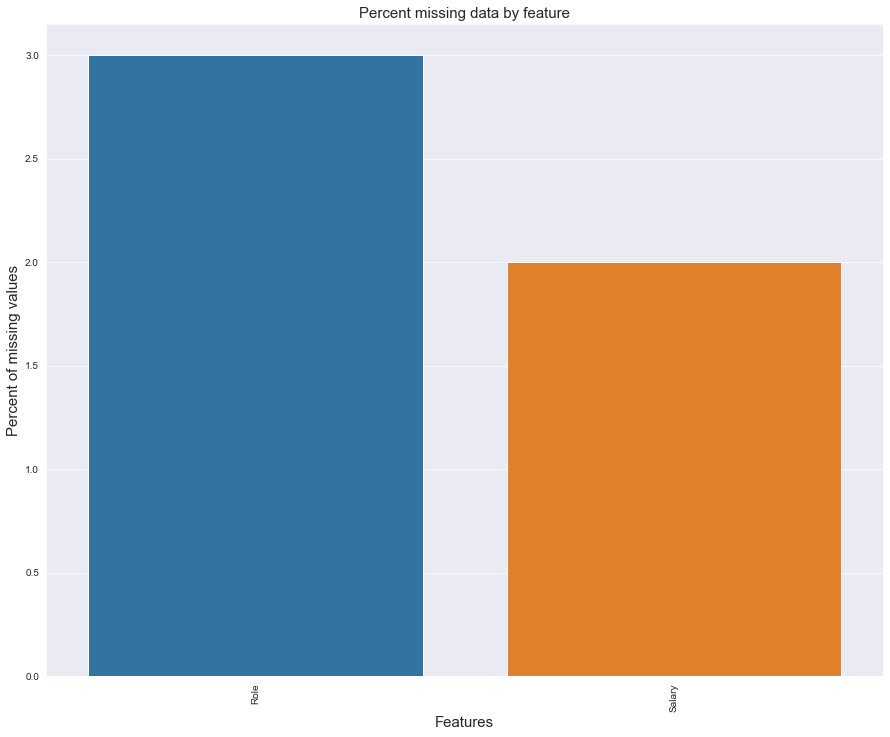

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data['Feature'], y=missing_data['Null Count'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [11]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index

missing_features = missing_data['Feature'].tolist()
missing_numerical_features = [x for x in missing_features if x in numerical_feats]
missing_categorical_features = [x for x in missing_features if x in categorical_feats]


print("Missing Numerical features: ", missing_numerical_features)
print("\nMissing Categorical features: ", missing_categorical_features)

Missing Numerical features:  []

Missing Categorical features:  ['Role', 'Salary']


In [9]:
drop_ratio = 70
drop_cols = missing_data.loc[missing_data['Null Ratio']>70,'Feature'].tolist()

print("Following columns were dropped because more than",drop_ratio,"% are missing::", drop_cols)

Following columns were dropped because more than 70 % are missing:: ['Role']


In [2]:

# drop all rows with any NaN and NaT values
df1 = df.dropna()
print(df1,"\n\n")


# Drop columns with any NaN and NaT values
df2 = df.dropna(axis=1)
print(df2)

     Name  ID Salary  Role
0  Pankaj   1    100   CEO
1  Meghna   2    200  None
2   David   3    NaN   NaT
3    Lisa   4    NaT   NaT 


     Name  ID Salary Role
0  Pankaj   1    100  CEO 


     Name  ID
0  Pankaj   1
1  Meghna   2
2   David   3
3    Lisa   4
